# 골목상권(상권, 상권배후지) 변수 상관분석

## 1. 상권배후지 데이터 가공 및 병합

### 0) 라이브러리,데이터 불러오기

In [1]:
# Html로 보이게 하는 코드
from IPython.core.display import display, HTML
display(HTML("<style>.container {width:90% !important;}</style>"))

/var/folders/nz/vk3v33x95bs4kf3ymy0z0my00000gn/T/ipykernel_11956/1981899770.py:2: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [2]:
import pandas as pd

#시각화, 한글폰트
%matplotlib inline  
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns 

# 맥 기본 폰트 중 사용
rc('font', family='AppleGothic') 
plt.rcParams['axes.unicode_minus'] = False

 - 상권배후지 데이터, 상권정보(영역) 데이터 불러오기

In [3]:
# 상주인구
DATA_PATH = '/Users/kimsinwoo/Desktop/multicampus/Project/상권배후지 raw data'

df = pd.read_csv(DATA_PATH + '/상권배후지_상주인구_3.csv')
job_df = pd.read_csv(DATA_PATH + '/상권배후지_직장인구_3.csv')
apart_df = pd.read_csv(DATA_PATH + '/상권배후지_아파트_3.csv')
center_df = pd.read_csv(DATA_PATH + '/상권배후지_직장인구_3.csv')
pop_df = pd.read_csv(DATA_PATH + '/상권배후지_생활인구_3.csv')
sales_df = pd.read_csv( '/Users/kimsinwoo/Desktop/multicampus/Project/상권 raw data' + '/raw통합.csv')
base_df = pd.read_csv('/Users/kimsinwoo/Desktop/multicampus/Project/상권 raw data/상권정보_2022.csv')

- 상권 병합 데이터 불러오기

In [4]:
com_merged_df = pd.read_csv('/Users/kimsinwoo/Desktop/multicampus/Project/상권 raw data/강남구데이터(집객시설포함)_outer.csv')
sales_df = pd.read_csv( '/Users/kimsinwoo/Desktop/multicampus/Project/상권 raw data' + '/raw통합.csv')

### 1) 데이터 전처리

- 필요한 컬럼만 남겨서 새로운 데이터 프레임 생성
- 한글 컬럼으로 변환

#### 상권배후지 상주인구 데이터

In [5]:
select_col = ['STDR_YY_CD','STDR_QU_CD','TRDAR_CD','TOT_REPOP_CO','TOT_HSHLD_CO','APT_HSHLD_CO','NON_APT_HSHLD_CO']
select_pop_df = df.loc[:,select_col]

In [6]:
select_pop_df

,STDR_YY_CD,STDR_QU_CD,TRDAR_CD,TOT_REPOP_CO,TOT_HSHLD_CO,APT_HSHLD_CO,NON_APT_HSHLD_CO
0,2020,1,2110001,5476.0,2054.0,0.0,2054.0
1,2020,1,2110002,8200.0,3061.0,0.0,3061.0
2,2020,1,2110003,10846.0,4250.0,0.0,4250.0
3,2020,1,2110004,12931.0,5596.0,0.0,5596.0
4,2020,1,2110005,9019.0,3806.0,0.0,3806.0
...,...,...,...,...,...,...,...
13075,2022,4,2111086,11672.0,4037.0,0.0,4037.0
13076,2022,4,2111087,8423.0,3504.0,0.0,3504.0
13077,2022,4,2111088,12677.0,4928.0,0.0,4928.0
13078,2022,4,2111089,11533.0,4395.0,0.0,4395.0


- 열이름 바꾸기

In [7]:
new_columns_name = ['기준_년도','기준_분기_코드','상권_코드','총 상주인구 수','총 가구 수','아파트 가구 수','비아파트 가구 수']

select_pop_df.columns = new_columns_name

In [8]:
select_pop_df 

,기준_년도,기준_분기_코드,상권_코드,총 상주인구 수,총 가구 수,아파트 가구 수,비아파트 가구 수
0,2020,1,2110001,5476.0,2054.0,0.0,2054.0
1,2020,1,2110002,8200.0,3061.0,0.0,3061.0
2,2020,1,2110003,10846.0,4250.0,0.0,4250.0
3,2020,1,2110004,12931.0,5596.0,0.0,5596.0
4,2020,1,2110005,9019.0,3806.0,0.0,3806.0
...,...,...,...,...,...,...,...
13075,2022,4,2111086,11672.0,4037.0,0.0,4037.0
13076,2022,4,2111087,8423.0,3504.0,0.0,3504.0
13077,2022,4,2111088,12677.0,4928.0,0.0,4928.0
13078,2022,4,2111089,11533.0,4395.0,0.0,4395.0


In [9]:
select_pop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13080 entries, 0 to 13079
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   기준_년도      13080 non-null  int64  
 1   기준_분기_코드   13080 non-null  int64  
 2   상권_코드      13080 non-null  int64  
 3   총 상주인구 수   13080 non-null  float64
 4   총 가구 수     13080 non-null  float64
 5   아파트 가구 수   13080 non-null  float64
 6   비아파트 가구 수  13080 non-null  float64
dtypes: float64(4), int64(3)
memory usage: 715.4 KB


#### 상권정보 데이터
- 시군구 데이터로 강남구를 한정하기 위함

In [10]:
base_df

,기준_년월_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,엑스좌표_값,와이좌표_값,시군구_코드,행정동_코드,형태정보
0,202112,A,골목상권,2110753,시흥동 은행나무사거리,191934,438813,11545,11545710,NaN
1,202112,A,골목상권,2110427,노원 을지대학교병원,206265,459431,11350,11350611,NaN
2,202112,A,골목상권,2110755,동일여자고등학교,192300,439070,11545,11545680,NaN
3,202112,A,골목상권,2110739,시흥3동 우편취급국,191289,438014,11545,11545690,NaN
4,202112,A,골목상권,2111017,송파나루역 3번,210222,445516,11710,11710562,NaN
...,...,...,...,...,...,...,...,...,...,...
1666,202112,U,관광특구,1001493,동대문패션타운 관광특구,200974,451975,11140,11140590,NaN
1667,202112,U,관광특구,1001494,종로?청계 관광특구,199768,452273,11110,11110615,NaN
1668,202112,U,관광특구,1001495,잠실 관광특구,210191,446339,11710,11710566,NaN
1669,202112,U,관광특구,1001496,강남 마이스 관광특구,205310,445727,11680,11680580,NaN


In [11]:
new_cols_name = ['상권_코드', '엑스좌표_값','와이좌표_값','시군구_코드']
select_base_df = base_df.loc[:, new_cols_name]


In [12]:
select_base_df # 강남구 11230

,상권_코드,엑스좌표_값,와이좌표_값,시군구_코드
0,2110753,191934,438813,11545
1,2110427,206265,459431,11350
2,2110755,192300,439070,11545
3,2110739,191289,438014,11545
4,2111017,210222,445516,11710
...,...,...,...,...
1666,1001493,200974,451975,11140
1667,1001494,199768,452273,11110
1668,1001495,210191,446339,11710
1669,1001496,205310,445727,11680


#### 상권배후지 직장인구 데이터

In [13]:
job_col = ['STDR_YY_CD','STDR_QU_CD','TRDAR_CD','TOT_WRC_POPLTN_CO']
job_pop_df = job_df.loc[:,job_col]

In [14]:
col_kr = ['기준_년도','기준_분기_코드','상권_코드','총_직장인구_수']
job_pop_df.columns = col_kr

In [15]:
job_pop_df

,기준_년도,기준_분기_코드,상권_코드,총_직장인구_수
0,2020,1,2110001,5968.0
1,2020,1,2110002,689.0
2,2020,1,2110003,4837.0
3,2020,1,2110004,470.0
4,2020,1,2110005,2723.0
...,...,...,...,...
13075,2022,4,2111086,862.0
13076,2022,4,2111087,743.0
13077,2022,4,2111088,1187.0
13078,2022,4,2111089,1080.0


#### 상권배후지 아파트 데이터

In [16]:
apart_df

,STDR_YY_CD,STDR_QU_CD,TRDAR_SE_CD,TRDAR_SE_CD_NM,TRDAR_CD,TRDAR_CD_NM,APT_HSMP_CO,AE_66_SQMT_BELO_HSHLD_CO,AE_66_SQMT_HSHLD_CO,AE_99_SQMT_HSHLD_CO,...,AE_165_SQMT_HSHLD_CO,PC_1_HDMIL_BELO_HSHLD_CO,PC_1_HDMIL_HSHLD_CO,PC_2_HDMIL_HSHLD_CO,PC_3_HDMIL_HSHLD_CO,PC_4_HDMIL_HSHLD_CO,PC_5_HDMIL_HSHLD_CO,PC_6_HDMIL_ABOVE_HSHLD_CO,AVRG_AE,AVRG_MKTC
0,2020,1,A,골목상권,2110001,이북5도청사,109.0,175.0,482.0,140.0,...,152.0,34.0,183.0,257.0,333.0,146.0,84.0,179.0,124.0,403676229.0
1,2020,2,A,골목상권,2110001,이북5도청사,109.0,175.0,482.0,140.0,...,152.0,34.0,183.0,257.0,333.0,146.0,84.0,179.0,124.0,403676229.0
2,2020,3,A,골목상권,2110001,이북5도청사,109.0,175.0,482.0,140.0,...,152.0,34.0,183.0,257.0,333.0,146.0,84.0,179.0,124.0,403676229.0
3,2020,4,A,골목상권,2110001,이북5도청사,112.0,190.0,502.0,140.0,...,152.0,28.0,161.0,243.0,390.0,129.0,102.0,198.0,123.0,425115367.0
4,2020,1,A,골목상권,2110002,독립문역 1번,9.0,180.0,1200.0,585.0,...,0.0,7.0,32.0,29.0,86.0,303.0,1165.0,375.0,90.0,509069075.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13051,2022,4,A,골목상권,2111089,상일여고(상일초등학교),118.0,1223.0,1433.0,313.0,...,0.0,58.0,507.0,97.0,111.0,76.0,70.0,2050.0,55.0,319493013.0
13052,2022,1,A,골목상권,2111090,강일동주민센터,30.0,1157.0,676.0,43.0,...,0.0,0.0,0.0,0.0,459.0,124.0,578.0,715.0,70.0,569084607.0
13053,2022,2,A,골목상권,2111090,강일동주민센터,30.0,1157.0,676.0,43.0,...,0.0,0.0,0.0,0.0,459.0,124.0,578.0,715.0,70.0,569084607.0
13054,2022,3,A,골목상권,2111090,강일동주민센터,30.0,1157.0,676.0,43.0,...,0.0,0.0,0.0,0.0,459.0,124.0,578.0,715.0,70.0,569084607.0


In [17]:
apart_col = ['STDR_YY_CD','STDR_QU_CD','TRDAR_CD','APT_HSMP_CO','PC_1_HDMIL_BELO_HSHLD_CO','PC_1_HDMIL_HSHLD_CO','PC_2_HDMIL_HSHLD_CO','PC_3_HDMIL_HSHLD_CO','PC_4_HDMIL_HSHLD_CO','PC_5_HDMIL_HSHLD_CO','PC_6_HDMIL_ABOVE_HSHLD_CO']
apt_df = apart_df.loc[:,apart_col]
apt_df # 컬럼 선택된 데이터 프레임

,STDR_YY_CD,STDR_QU_CD,TRDAR_CD,APT_HSMP_CO,PC_1_HDMIL_BELO_HSHLD_CO,PC_1_HDMIL_HSHLD_CO,PC_2_HDMIL_HSHLD_CO,PC_3_HDMIL_HSHLD_CO,PC_4_HDMIL_HSHLD_CO,PC_5_HDMIL_HSHLD_CO,PC_6_HDMIL_ABOVE_HSHLD_CO
0,2020,1,2110001,109.0,34.0,183.0,257.0,333.0,146.0,84.0,179.0
1,2020,2,2110001,109.0,34.0,183.0,257.0,333.0,146.0,84.0,179.0
2,2020,3,2110001,109.0,34.0,183.0,257.0,333.0,146.0,84.0,179.0
3,2020,4,2110001,112.0,28.0,161.0,243.0,390.0,129.0,102.0,198.0
4,2020,1,2110002,9.0,7.0,32.0,29.0,86.0,303.0,1165.0,375.0
...,...,...,...,...,...,...,...,...,...,...,...
13051,2022,4,2111089,118.0,58.0,507.0,97.0,111.0,76.0,70.0,2050.0
13052,2022,1,2111090,30.0,0.0,0.0,0.0,459.0,124.0,578.0,715.0
13053,2022,2,2111090,30.0,0.0,0.0,0.0,459.0,124.0,578.0,715.0
13054,2022,3,2111090,30.0,0.0,0.0,0.0,459.0,124.0,578.0,715.0


In [18]:
apt_new_col = ['기준_년도','기준_분기_코드','상권_코드','아파트_단지_수','아파트_가격_1_억_미만_세대_수','아파트_가격_1_억_세대_수','아파트_가격_2_억_세대_수','아파트_가격_3_억_세대_수','아파트_가격_4_억_세대_수','아파트_가격_5_억_세대_수','아파트_가격_6_억_이상_세대_수']
apt_df.columns = apt_new_col

In [19]:
apt_df # 아파트 데이터 컬럼 제거 완료

,기준_년도,기준_분기_코드,상권_코드,아파트_단지_수,아파트_가격_1_억_미만_세대_수,아파트_가격_1_억_세대_수,아파트_가격_2_억_세대_수,아파트_가격_3_억_세대_수,아파트_가격_4_억_세대_수,아파트_가격_5_억_세대_수,아파트_가격_6_억_이상_세대_수
0,2020,1,2110001,109.0,34.0,183.0,257.0,333.0,146.0,84.0,179.0
1,2020,2,2110001,109.0,34.0,183.0,257.0,333.0,146.0,84.0,179.0
2,2020,3,2110001,109.0,34.0,183.0,257.0,333.0,146.0,84.0,179.0
3,2020,4,2110001,112.0,28.0,161.0,243.0,390.0,129.0,102.0,198.0
4,2020,1,2110002,9.0,7.0,32.0,29.0,86.0,303.0,1165.0,375.0
...,...,...,...,...,...,...,...,...,...,...,...
13051,2022,4,2111089,118.0,58.0,507.0,97.0,111.0,76.0,70.0,2050.0
13052,2022,1,2111090,30.0,0.0,0.0,0.0,459.0,124.0,578.0,715.0
13053,2022,2,2111090,30.0,0.0,0.0,0.0,459.0,124.0,578.0,715.0
13054,2022,3,2111090,30.0,0.0,0.0,0.0,459.0,124.0,578.0,715.0


#### 상권배후지 집객시설 데이터

In [20]:
center_df

,STDR_YY_CD,STDR_QU_CD,TRDAR_SE_CD,TRDAR_SE_CD_NM,TRDAR_CD,TRDAR_CD_NM,TOT_WRC_POPLTN_CO,ML_WRC_POPLTN_CO,FML_WRC_POPLTN_CO,AGRDE_10_WRC_POPLTN_CO,...,MAG_30_WRC_POPLTN_CO,MAG_40_WRC_POPLTN_CO,MAG_50_WRC_POPLTN_CO,MAG_60_ABOVE_WRC_POPLTN_CO,FAG_10_WRC_POPLTN_CO,FAG_20_WRC_POPLTN_CO,FAG_30_WRC_POPLTN_CO,FAG_40_WRC_POPLTN_CO,FAG_50_WRC_POPLTN_CO,FAG_60_ABOVE_WRC_POPLTN_CO
0,2020,1,A,골목상권,2110001,이북5도청사,5968.0,4230.0,1738.0,11.0,...,935.0,1087.0,1267.0,368.0,4.0,518.0,500.0,296.0,259.0,161.0
1,2020,1,A,골목상권,2110002,독립문역 1번,689.0,209.0,480.0,7.0,...,46.0,59.0,37.0,24.0,1.0,136.0,157.0,107.0,65.0,14.0
2,2020,1,A,골목상권,2110003,세검정초등학교,4837.0,2723.0,2114.0,16.0,...,684.0,764.0,595.0,434.0,9.0,379.0,627.0,458.0,422.0,219.0
3,2020,1,A,골목상권,2110004,대신고등학교,470.0,276.0,194.0,6.0,...,63.0,61.0,59.0,55.0,1.0,29.0,46.0,51.0,54.0,13.0
4,2020,1,A,골목상권,2110005,세검정,2723.0,1465.0,1258.0,9.0,...,361.0,399.0,341.0,211.0,6.0,197.0,354.0,321.0,282.0,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13075,2022,4,A,골목상권,2111086,한영중고,862.0,441.0,421.0,1.0,...,75.0,97.0,157.0,79.0,0.0,41.0,121.0,112.0,127.0,20.0
13076,2022,4,A,골목상권,2111087,고덕중학교(고덕2동주민센터),743.0,270.0,473.0,0.0,...,54.0,69.0,77.0,53.0,0.0,68.0,103.0,115.0,131.0,56.0
13077,2022,4,A,골목상권,2111088,고덕동성당,1187.0,964.0,223.0,0.0,...,55.0,178.0,388.0,333.0,0.0,30.0,37.0,52.0,76.0,28.0
13078,2022,4,A,골목상권,2111089,상일여고(상일초등학교),1080.0,716.0,364.0,0.0,...,146.0,184.0,192.0,136.0,0.0,65.0,70.0,76.0,105.0,48.0


In [21]:
center_delete_col = ['TRDAR_SE_CD','TRDAR_SE_CD_NM','TRDAR_CD_NM']
center_df.drop(columns = center_delete_col, inplace = True)          

In [22]:
center_df

,STDR_YY_CD,STDR_QU_CD,TRDAR_CD,TOT_WRC_POPLTN_CO,ML_WRC_POPLTN_CO,FML_WRC_POPLTN_CO,AGRDE_10_WRC_POPLTN_CO,AGRDE_20_WRC_POPLTN_CO,AGRDE_30_WRC_POPLTN_CO,AGRDE_40_WRC_POPLTN_CO,...,MAG_30_WRC_POPLTN_CO,MAG_40_WRC_POPLTN_CO,MAG_50_WRC_POPLTN_CO,MAG_60_ABOVE_WRC_POPLTN_CO,FAG_10_WRC_POPLTN_CO,FAG_20_WRC_POPLTN_CO,FAG_30_WRC_POPLTN_CO,FAG_40_WRC_POPLTN_CO,FAG_50_WRC_POPLTN_CO,FAG_60_ABOVE_WRC_POPLTN_CO
0,2020,1,2110001,5968.0,4230.0,1738.0,11.0,1084.0,1435.0,1383.0,...,935.0,1087.0,1267.0,368.0,4.0,518.0,500.0,296.0,259.0,161.0
1,2020,1,2110002,689.0,209.0,480.0,7.0,173.0,203.0,166.0,...,46.0,59.0,37.0,24.0,1.0,136.0,157.0,107.0,65.0,14.0
2,2020,1,2110003,4837.0,2723.0,2114.0,16.0,618.0,1311.0,1222.0,...,684.0,764.0,595.0,434.0,9.0,379.0,627.0,458.0,422.0,219.0
3,2020,1,2110004,470.0,276.0,194.0,6.0,62.0,109.0,112.0,...,63.0,61.0,59.0,55.0,1.0,29.0,46.0,51.0,54.0,13.0
4,2020,1,2110005,2723.0,1465.0,1258.0,9.0,347.0,715.0,720.0,...,361.0,399.0,341.0,211.0,6.0,197.0,354.0,321.0,282.0,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13075,2022,4,2111086,862.0,441.0,421.0,1.0,73.0,196.0,209.0,...,75.0,97.0,157.0,79.0,0.0,41.0,121.0,112.0,127.0,20.0
13076,2022,4,2111087,743.0,270.0,473.0,0.0,85.0,157.0,184.0,...,54.0,69.0,77.0,53.0,0.0,68.0,103.0,115.0,131.0,56.0
13077,2022,4,2111088,1187.0,964.0,223.0,0.0,40.0,92.0,230.0,...,55.0,178.0,388.0,333.0,0.0,30.0,37.0,52.0,76.0,28.0
13078,2022,4,2111089,1080.0,716.0,364.0,0.0,123.0,216.0,260.0,...,146.0,184.0,192.0,136.0,0.0,65.0,70.0,76.0,105.0,48.0


In [23]:
sel_col = ['기준_년도','기준_분기_코드','상권_코드','집객시설_수','관공서_수','은행_수','종합병원_수','일반_병원_수','약국_수','유치원_수','초등학교_수','중학교_수'
 ,'고등학교_수','대학교_수','백화점_수','슈퍼마켓_수','극장_수','숙박_시설_수','공항_수','철도_역_수','버스_터미널_수'
 ,'지하철_역_수','버스_정거장_수','지하철_역_수']

In [24]:
center_df.columns = sel_col

In [25]:
center_df

,기준_년도,기준_분기_코드,상권_코드,집객시설_수,관공서_수,은행_수,종합병원_수,일반_병원_수,약국_수,유치원_수,...,백화점_수,슈퍼마켓_수,극장_수,숙박_시설_수,공항_수,철도_역_수,버스_터미널_수,지하철_역_수,버스_정거장_수,지하철_역_수
0,2020,1,2110001,5968.0,4230.0,1738.0,11.0,1084.0,1435.0,1383.0,...,935.0,1087.0,1267.0,368.0,4.0,518.0,500.0,296.0,259.0,161.0
1,2020,1,2110002,689.0,209.0,480.0,7.0,173.0,203.0,166.0,...,46.0,59.0,37.0,24.0,1.0,136.0,157.0,107.0,65.0,14.0
2,2020,1,2110003,4837.0,2723.0,2114.0,16.0,618.0,1311.0,1222.0,...,684.0,764.0,595.0,434.0,9.0,379.0,627.0,458.0,422.0,219.0
3,2020,1,2110004,470.0,276.0,194.0,6.0,62.0,109.0,112.0,...,63.0,61.0,59.0,55.0,1.0,29.0,46.0,51.0,54.0,13.0
4,2020,1,2110005,2723.0,1465.0,1258.0,9.0,347.0,715.0,720.0,...,361.0,399.0,341.0,211.0,6.0,197.0,354.0,321.0,282.0,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13075,2022,4,2111086,862.0,441.0,421.0,1.0,73.0,196.0,209.0,...,75.0,97.0,157.0,79.0,0.0,41.0,121.0,112.0,127.0,20.0
13076,2022,4,2111087,743.0,270.0,473.0,0.0,85.0,157.0,184.0,...,54.0,69.0,77.0,53.0,0.0,68.0,103.0,115.0,131.0,56.0
13077,2022,4,2111088,1187.0,964.0,223.0,0.0,40.0,92.0,230.0,...,55.0,178.0,388.0,333.0,0.0,30.0,37.0,52.0,76.0,28.0
13078,2022,4,2111089,1080.0,716.0,364.0,0.0,123.0,216.0,260.0,...,146.0,184.0,192.0,136.0,0.0,65.0,70.0,76.0,105.0,48.0


In [26]:
center_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13080 entries, 0 to 13079
Data columns (total 24 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   기준_년도     13080 non-null  int64  
 1   기준_분기_코드  13080 non-null  int64  
 2   상권_코드     13080 non-null  int64  
 3   집객시설_수    13080 non-null  float64
 4   관공서_수     13080 non-null  float64
 5   은행_수      13080 non-null  float64
 6   종합병원_수    13080 non-null  float64
 7   일반_병원_수   13080 non-null  float64
 8   약국_수      13080 non-null  float64
 9   유치원_수     13080 non-null  float64
 10  초등학교_수    13080 non-null  float64
 11  중학교_수     13080 non-null  float64
 12  고등학교_수    13080 non-null  float64
 13  대학교_수     13080 non-null  float64
 14  백화점_수     13080 non-null  float64
 15  슈퍼마켓_수    13080 non-null  float64
 16  극장_수      13080 non-null  float64
 17  숙박_시설_수   13080 non-null  float64
 18  공항_수      13080 non-null  float64
 19  철도_역_수    13080 non-null  float64
 20  버스_터미널_수  13080 non-null  fl

#### 상권 생활인구 데이터

In [27]:
pop_df

,STDR_YY_CD,STDR_QU_CD,TRDAR_SE_CD,TRDAR_SE_CD_NM,TRDAR_CD,TRDAR_CD_NM,TOT_FLPOP_CO,ML_FLPOP_CO,FML_FLPOP_CO,AGRDE_10_FLPOP_CO,...,FAG_60_ABOVE_SATTM_3_FLPOP_CO,FAG_60_ABOVE_SATTM_4_FLPOP_CO,FAG_60_ABOVE_SATTM_5_FLPOP_CO,FAG_60_ABOVE_SATTM_6_FLPOP_CO,FAG_60_ABOVE_SUNTM_1_FLPOP_CO,FAG_60_ABOVE_SUNTM_2_FLPOP_CO,FAG_60_ABOVE_SUNTM_3_FLPOP_CO,FAG_60_ABOVE_SUNTM_4_FLPOP_CO,FAG_60_ABOVE_SUNTM_5_FLPOP_CO,FAG_60_ABOVE_SUNTM_6_FLPOP_CO
0,2020,1,A,골목상권,2110001,이북5도청사,465487.0,210930.0,254558.0,83188.0,...,1468.0,1451.0,2088.0,1576.0,3153.0,2557.0,1529.0,1524.0,2084.0,1564.0
1,2020,1,A,골목상권,2110002,독립문역 1번,1629774.0,741437.0,888337.0,295711.0,...,4534.0,4351.0,5872.0,4986.0,9832.0,8347.0,4493.0,4468.0,6220.0,5135.0
2,2020,1,A,골목상권,2110003,세검정초등학교,1371520.0,612140.0,759381.0,221725.0,...,4288.0,4151.0,5857.0,4569.0,8596.0,7438.0,4444.0,4284.0,5977.0,4623.0
3,2020,1,A,골목상권,2110004,대신고등학교,3260433.0,1456101.0,1804332.0,689944.0,...,8068.0,7817.0,10850.0,8893.0,18171.0,14866.0,8398.0,7942.0,11126.0,9052.0
4,2020,1,A,골목상권,2110005,세검정,1229275.0,543744.0,685532.0,184043.0,...,3938.0,3762.0,5250.0,4031.0,7305.0,6601.0,4048.0,3832.0,5324.0,4115.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13075,2022,4,A,골목상권,2111086,한영중고,1141083.0,523653.0,617430.0,311121.0,...,2486.0,2240.0,3222.0,3094.0,6534.0,6033.0,2952.0,2351.0,3651.0,3133.0
13076,2022,4,A,골목상권,2111087,고덕중학교(고덕2동주민센터),961670.0,484921.0,476750.0,188964.0,...,2025.0,1918.0,2792.0,2513.0,5139.0,4016.0,1994.0,2012.0,2983.0,2536.0
13077,2022,4,A,골목상권,2111088,고덕동성당,1488990.0,709333.0,779656.0,283048.0,...,3419.0,3298.0,4571.0,3348.0,6648.0,6031.0,3403.0,3369.0,4570.0,3388.0
13078,2022,4,A,골목상권,2111089,상일여고(상일초등학교),1888477.0,886501.0,1001974.0,332488.0,...,4022.0,3828.0,5605.0,4646.0,9713.0,7647.0,4057.0,4087.0,5883.0,4788.0


In [28]:
pop_cols = ['STDR_YY_CD','STDR_QU_CD','TRDAR_CD','TOT_FLPOP_CO','TMZON_1_FLPOP_CO','TMZON_2_FLPOP_CO','TMZON_3_FLPOP_CO','TMZON_4_FLPOP_CO'
,'TMZON_5_FLPOP_CO','TMZON_6_FLPOP_CO','MON_FLPOP_CO','TUES_FLPOP_CO','WED_FLPOP_CO','THUR_FLPOP_CO','FRI_FLPOP_CO','SAT_FLPOP_CO','SUN_FLPOP_CO']

pop_kr_df = pop_df.loc[:,pop_cols]

In [29]:
pop_kr_cols = ['기준_년도','기준_분기_코드','상권_코드','총_생활인구_수','시간대_1_생활인구_수','시간대_2_생활인구_수','시간대_3_생활인구_수','시간대_4_생활인구_수','시간대_5_생활인구_수','시간대_6_생활인구_수','월요일_생활인구_수','화요일_생활인구_수','수요일_생활인구_수'
,'목요일_생활인구_수','금요일_생활인구_수','토요일_생활인구_수','일요일_생활인구_수']
pop_kr_df.columns = pop_kr_cols

In [30]:
pop_kr_df

,기준_년도,기준_분기_코드,상권_코드,총_생활인구_수,시간대_1_생활인구_수,시간대_2_생활인구_수,시간대_3_생활인구_수,시간대_4_생활인구_수,시간대_5_생활인구_수,시간대_6_생활인구_수,월요일_생활인구_수,화요일_생활인구_수,수요일_생활인구_수,목요일_생활인구_수,금요일_생활인구_수,토요일_생활인구_수,일요일_생활인구_수
0,2020,1,2110001,465487.0,128555.0,98707.0,52684.0,51643.0,72687.0,61211.0,65295.0,65572.0,65674.0,65097.0,65090.0,68770.0,69990.0
1,2020,1,2110002,1629774.0,432112.0,352406.0,187018.0,184229.0,258327.0,215681.0,233323.0,235403.0,234723.0,233744.0,231486.0,229025.0,232069.0
2,2020,1,2110003,1371520.0,364855.0,291145.0,161031.0,155792.0,218562.0,180136.0,193840.0,194785.0,194797.0,193804.0,193259.0,198973.0,202062.0
3,2020,1,2110004,3260433.0,916148.0,686954.0,363298.0,351432.0,511251.0,431351.0,464351.0,464518.0,465866.0,461717.0,459211.0,468078.0,476690.0
4,2020,1,2110005,1229275.0,312853.0,261145.0,150323.0,145329.0,200573.0,159050.0,174616.0,175541.0,175739.0,174943.0,174001.0,176445.0,177989.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13075,2022,4,2111086,1141083.0,326346.0,246390.0,127184.0,117464.0,172024.0,151676.0,162929.0,163175.0,163793.0,161612.0,163269.0,159443.0,166862.0
13076,2022,4,2111087,961670.0,264806.0,217198.0,112142.0,104166.0,138497.0,124860.0,139170.0,140370.0,139432.0,139531.0,137062.0,132950.0,133153.0
13077,2022,4,2111088,1488990.0,389116.0,327133.0,172743.0,171648.0,239845.0,188505.0,213668.0,212320.0,212262.0,213668.0,212656.0,212320.0,212094.0
13078,2022,4,2111089,1888477.0,493094.0,405347.0,225826.0,214120.0,304695.0,245396.0,274786.0,276181.0,275448.0,272738.0,271200.0,257778.0,260345.0


### 2) 데이터 병합
- 위에서 전처리한 상권배후지 데이터를 공통컬럼을 기준으로 병합

In [31]:
merged_df = select_pop_df.merge(job_pop_df, on=['기준_년도','상권_코드', '기준_분기_코드'], how='outer') \
                       .merge(apt_df, on=['기준_년도','상권_코드', '기준_분기_코드'], how='outer') \
                       .merge(pop_kr_df, on=['기준_년도','상권_코드', '기준_분기_코드'], how='outer')\
                       .merge(center_df, on=['기준_년도','상권_코드', '기준_분기_코드'], how='outer')



In [32]:
merged_df

,기준_년도,기준_분기_코드,상권_코드,총 상주인구 수,총 가구 수,아파트 가구 수,비아파트 가구 수,총_직장인구_수,아파트_단지_수,아파트_가격_1_억_미만_세대_수,...,백화점_수,슈퍼마켓_수,극장_수,숙박_시설_수,공항_수,철도_역_수,버스_터미널_수,지하철_역_수,버스_정거장_수,지하철_역_수
0,2020,1,2110001,5476.0,2054.0,0.0,2054.0,5968.0,109.0,34.0,...,935.0,1087.0,1267.0,368.0,4.0,518.0,500.0,296.0,259.0,161.0
1,2020,1,2110002,8200.0,3061.0,0.0,3061.0,689.0,9.0,7.0,...,46.0,59.0,37.0,24.0,1.0,136.0,157.0,107.0,65.0,14.0
2,2020,1,2110003,10846.0,4250.0,0.0,4250.0,4837.0,206.0,161.0,...,684.0,764.0,595.0,434.0,9.0,379.0,627.0,458.0,422.0,219.0
3,2020,1,2110004,12931.0,5596.0,0.0,5596.0,470.0,202.0,465.0,...,63.0,61.0,59.0,55.0,1.0,29.0,46.0,51.0,54.0,13.0
4,2020,1,2110005,9019.0,3806.0,0.0,3806.0,2723.0,165.0,194.0,...,361.0,399.0,341.0,211.0,6.0,197.0,354.0,321.0,282.0,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13075,2022,4,2111086,11672.0,4037.0,0.0,4037.0,862.0,72.0,9.0,...,75.0,97.0,157.0,79.0,0.0,41.0,121.0,112.0,127.0,20.0
13076,2022,4,2111087,8423.0,3504.0,0.0,3504.0,743.0,51.0,0.0,...,54.0,69.0,77.0,53.0,0.0,68.0,103.0,115.0,131.0,56.0
13077,2022,4,2111088,12677.0,4928.0,0.0,4928.0,1187.0,70.0,61.0,...,55.0,178.0,388.0,333.0,0.0,30.0,37.0,52.0,76.0,28.0
13078,2022,4,2111089,11533.0,4395.0,0.0,4395.0,1080.0,118.0,58.0,...,146.0,184.0,192.0,136.0,0.0,65.0,70.0,76.0,105.0,48.0


In [33]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13080 entries, 0 to 13079
Data columns (total 51 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   기준_년도               13080 non-null  int64  
 1   기준_분기_코드            13080 non-null  int64  
 2   상권_코드               13080 non-null  int64  
 3   총 상주인구 수            13080 non-null  float64
 4   총 가구 수              13080 non-null  float64
 5   아파트 가구 수            13080 non-null  float64
 6   비아파트 가구 수           13080 non-null  float64
 7   총_직장인구_수            13080 non-null  float64
 8   아파트_단지_수            13056 non-null  float64
 9   아파트_가격_1_억_미만_세대_수  13056 non-null  float64
 10  아파트_가격_1_억_세대_수     13056 non-null  float64
 11  아파트_가격_2_억_세대_수     13056 non-null  float64
 12  아파트_가격_3_억_세대_수     13056 non-null  float64
 13  아파트_가격_4_억_세대_수     13056 non-null  float64
 14  아파트_가격_5_억_세대_수     13056 non-null  float64
 15  아파트_가격_6_억_이상_세대_수  13056 non-null  float64
 16  총_생활

#### 강남구로 지역 필터링

In [34]:
select_base_df

,상권_코드,엑스좌표_값,와이좌표_값,시군구_코드
0,2110753,191934,438813,11545
1,2110427,206265,459431,11350
2,2110755,192300,439070,11545
3,2110739,191289,438014,11545
4,2111017,210222,445516,11710
...,...,...,...,...
1666,1001493,200974,451975,11140
1667,1001494,199768,452273,11110
1668,1001495,210191,446339,11710
1669,1001496,205310,445727,11680


- 강남구 시군구코드 추출

In [35]:
df_area_gangnam = select_base_df[select_base_df['시군구_코드'] == 11680] # 강남 시군구 코드 : 11680
df_area_gangnam

,상권_코드,엑스좌표_값,와이좌표_값,시군구_코드
6,2110963,203260,443659,11680
24,2110972,203786,443905,11680
26,2110969,203564,444385,11680
27,2111002,210597,441133,11680
30,2110993,205157,442012,11680
...,...,...,...,...
1530,2130307,204562,444257,11680
1564,2130304,202511,448086,11680
1573,2130306,203788,445046,11680
1585,2130303,202135,445507,11680


- 상권코드를 기준으로 상권배후지 병합 데이터를 강남구로 필터링

In [36]:
code = df_area_gangnam["상권_코드"].tolist()

In [37]:
gn_df = merged_df[merged_df['상권_코드'].isin(code)]
gn_df = gn_df.reset_index(drop=True)
gn_df.to_csv(DATA_PATH + '/상권배후지데이터병합_outer_2022.csv',encoding = 'utf-8-sig')

In [38]:
sales_gn_df = sales_df[sales_df['상권_코드'].isin(code)]

In [39]:
gn_df

,기준_년도,기준_분기_코드,상권_코드,총 상주인구 수,총 가구 수,아파트 가구 수,비아파트 가구 수,총_직장인구_수,아파트_단지_수,아파트_가격_1_억_미만_세대_수,...,백화점_수,슈퍼마켓_수,극장_수,숙박_시설_수,공항_수,철도_역_수,버스_터미널_수,지하철_역_수,버스_정거장_수,지하철_역_수
0,2020,1,2110949,9128.0,3710.0,0.0,3710.0,12160.0,57.0,5.0,...,2371.0,2209.0,1313.0,699.0,18.0,1288.0,1319.0,1052.0,597.0,208.0
1,2020,1,2110950,6010.0,3289.0,0.0,3289.0,19297.0,125.0,28.0,...,3758.0,3112.0,1836.0,1126.0,22.0,2463.0,2442.0,1426.0,926.0,382.0
2,2020,1,2110951,5843.0,3133.0,0.0,3133.0,12925.0,108.0,11.0,...,2106.0,1920.0,1102.0,762.0,37.0,2192.0,1671.0,938.0,568.0,299.0
3,2020,1,2110952,8856.0,5608.0,0.0,5608.0,10637.0,173.0,24.0,...,2250.0,1740.0,1096.0,649.0,6.0,969.0,1120.0,778.0,574.0,305.0
4,2020,1,2110953,6881.0,3908.0,0.0,3908.0,26213.0,160.0,22.0,...,5202.0,4071.0,2370.0,1498.0,64.0,3783.0,3133.0,1593.0,1011.0,469.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
643,2022,4,2110998,12016.0,4588.0,0.0,4588.0,128.0,47.0,0.0,...,18.0,19.0,14.0,7.0,2.0,5.0,23.0,16.0,11.0,6.0
644,2022,4,2110999,14473.0,7366.0,0.0,7366.0,464.0,29.0,0.0,...,50.0,56.0,81.0,52.0,2.0,18.0,30.0,30.0,58.0,69.0
645,2022,4,2111000,3840.0,1495.0,0.0,1495.0,294.0,12.0,0.0,...,31.0,49.0,30.0,14.0,3.0,24.0,53.0,44.0,26.0,6.0
646,2022,4,2111001,10750.0,5710.0,0.0,5710.0,290.0,17.0,0.0,...,28.0,30.0,53.0,38.0,1.0,6.0,14.0,19.0,49.0,44.0


In [40]:
back_dt_df = gn_df.merge(df_area_gangnam, on = '상권_코드',how = 'left')

In [41]:
back_dt_df

,기준_년도,기준_분기_코드,상권_코드,총 상주인구 수,총 가구 수,아파트 가구 수,비아파트 가구 수,총_직장인구_수,아파트_단지_수,아파트_가격_1_억_미만_세대_수,...,숙박_시설_수,공항_수,철도_역_수,버스_터미널_수,지하철_역_수,버스_정거장_수,지하철_역_수,엑스좌표_값,와이좌표_값,시군구_코드
0,2020,1,2110949,9128.0,3710.0,0.0,3710.0,12160.0,57.0,5.0,...,699.0,18.0,1288.0,1319.0,1052.0,597.0,208.0,201717,446819,11680
1,2020,1,2110950,6010.0,3289.0,0.0,3289.0,19297.0,125.0,28.0,...,1126.0,22.0,2463.0,2442.0,1426.0,926.0,382.0,202121,446015,11680
2,2020,1,2110951,5843.0,3133.0,0.0,3133.0,12925.0,108.0,11.0,...,762.0,37.0,2192.0,1671.0,938.0,568.0,299.0,202246,446821,11680
3,2020,1,2110952,8856.0,5608.0,0.0,5608.0,10637.0,173.0,24.0,...,649.0,6.0,969.0,1120.0,778.0,574.0,305.0,202328,445762,11680
4,2020,1,2110953,6881.0,3908.0,0.0,3908.0,26213.0,160.0,22.0,...,1498.0,64.0,3783.0,3133.0,1593.0,1011.0,469.0,202416,446272,11680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
643,2022,4,2110998,12016.0,4588.0,0.0,4588.0,128.0,47.0,0.0,...,7.0,2.0,5.0,23.0,16.0,11.0,6.0,208683,440814,11680
644,2022,4,2110999,14473.0,7366.0,0.0,7366.0,464.0,29.0,0.0,...,52.0,2.0,18.0,30.0,30.0,58.0,69.0,209174,441371,11680
645,2022,4,2111000,3840.0,1495.0,0.0,1495.0,294.0,12.0,0.0,...,14.0,3.0,24.0,53.0,44.0,26.0,6.0,209446,440477,11680
646,2022,4,2111001,10750.0,5710.0,0.0,5710.0,290.0,17.0,0.0,...,38.0,1.0,6.0,14.0,19.0,49.0,44.0,209670,441375,11680


In [42]:
back_dt_df.to_csv(DATA_PATH + '/강남구배후지데이터_outer_202122.csv', encoding = 'utf-8')

In [43]:
back_dt_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 648 entries, 0 to 647
Data columns (total 54 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   기준_년도               648 non-null    int64  
 1   기준_분기_코드            648 non-null    int64  
 2   상권_코드               648 non-null    int64  
 3   총 상주인구 수            648 non-null    float64
 4   총 가구 수              648 non-null    float64
 5   아파트 가구 수            648 non-null    float64
 6   비아파트 가구 수           648 non-null    float64
 7   총_직장인구_수            648 non-null    float64
 8   아파트_단지_수            636 non-null    float64
 9   아파트_가격_1_억_미만_세대_수  636 non-null    float64
 10  아파트_가격_1_억_세대_수     636 non-null    float64
 11  아파트_가격_2_억_세대_수     636 non-null    float64
 12  아파트_가격_3_억_세대_수     636 non-null    float64
 13  아파트_가격_4_억_세대_수     636 non-null    float64
 14  아파트_가격_5_억_세대_수     636 non-null    float64
 15  아파트_가격_6_억_이상_세대_수  636 non-null    float64
 16  총_생활인구_수

In [44]:
back_dt_df.isna().sum()

기준_년도                  0
기준_분기_코드               0
상권_코드                  0
총 상주인구 수               0
총 가구 수                 0
아파트 가구 수               0
비아파트 가구 수              0
총_직장인구_수               0
아파트_단지_수              12
아파트_가격_1_억_미만_세대_수    12
아파트_가격_1_억_세대_수       12
아파트_가격_2_억_세대_수       12
아파트_가격_3_억_세대_수       12
아파트_가격_4_억_세대_수       12
아파트_가격_5_억_세대_수       12
아파트_가격_6_억_이상_세대_수    12
총_생활인구_수               0
시간대_1_생활인구_수           0
시간대_2_생활인구_수           0
시간대_3_생활인구_수           0
시간대_4_생활인구_수           0
시간대_5_생활인구_수           0
시간대_6_생활인구_수           0
월요일_생활인구_수             0
화요일_생활인구_수             0
수요일_생활인구_수             0
목요일_생활인구_수             0
금요일_생활인구_수             0
토요일_생활인구_수             0
일요일_생활인구_수             0
집객시설_수                 0
관공서_수                  0
은행_수                   0
종합병원_수                 0
일반_병원_수                0
약국_수                   0
유치원_수                  0
초등학교_수                 0
중학교_수                  0
고등학교_수                 0


In [45]:
back_dt_df.rename(columns={'기준_년도': '기준_년_코드'}, inplace=True)

In [46]:
back_dt_df.rename(columns={'기준_분기': '기준_분기_코드'}, inplace=True)

#### 상권 raw data(상권병합데이터)에서 골목상권 값만 추출
- 상권 raw data : 강남구, 편의점으로 필터링된 csv

In [47]:
com_dt_A_df = sales_df.loc[sales_df['상권_구분_코드_명'] == '골목상권',:].reset_index(drop=True)

In [48]:
com_dt_A_df

,기준_년_코드,기준_분기_코드,상권_구분_코드_명,상권_코드,상권_코드_명,시간대_00~06_매출_금액,시간대_06~11_매출_금액,시간대_11~14_매출_금액,시간대_14~17_매출_금액,시간대_17~21_매출_금액,시간대_21~24_매출_금액,점포수,일 수
0,2020,1,골목상권,2110949,한남IC,68339080,118572024,139963422,118603505,166190838,121688284,6,91
1,2020,1,골목상권,2110951,신사은행나무공원,25849885,18145653,21966129,23851846,51569126,42414494,3,91
2,2020,1,골목상권,2110952,논현목련공원,48522054,34719845,28733896,28127470,59505131,47412961,3,91
3,2020,1,골목상권,2110954,국기원,9442457,15310424,20250099,22801289,37691665,24498449,3,91
4,2020,1,골목상권,2110955,논현초등학교,603497849,397426434,301122740,374157808,864243551,655548321,30,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,2022,4,골목상권,2110958,역삼역 4번,27839665,53272675,52710110,37382074,53695271,32827815,3,92
408,2022,4,골목상권,2110976,언북초등학교,23228755,70862698,44987619,45637947,92351530,59079684,3,92
409,2022,4,골목상권,2110961,언주역 3번,80086932,118828358,142026426,111727011,200067823,125146538,4,92
410,2022,4,골목상권,2110971,선정릉역 4번,330097157,290069520,233140082,250452766,438607236,343459626,7,92


In [49]:
A_code_only = com_dt_A_df.상권_코드.tolist()

#### 상권데이터 불러오기

상권 merge 데이터와 상권배후지 데이터의 골목상권만 merge

In [50]:
com_merged_df

,Unnamed: 0,기준_년도,기준_분기_코드,상권_코드,총 상주인구 수,총 가구 수,아파트 가구 수,비아파트 가구 수,총_직장인구_수,아파트_단지_수,...,대학교_수,백화점_수,슈퍼마켓_수,극장_수,숙박_시설_수,공항_수,철도_역_수,버스_터미널_수,지하철_역_수,버스_정거장_수
0,0,2020,1,2110001,1097.0,413.0,0.0,413.0,1066.0,18.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0
1,1,2020,1,2110002,627.0,337.0,0.0,337.0,475.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0
2,2,2020,1,2110003,3177.0,1228.0,0.0,1228.0,485.0,60.0,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,5.0
3,3,2020,1,2110004,458.0,240.0,0.0,240.0,32.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
4,4,2020,1,2110005,1821.0,746.0,0.0,746.0,1006.0,39.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20047,20047,2022,4,2130251,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20048,20048,2022,4,2130252,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
20049,20049,2022,4,2130297,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20050,20050,2022,4,2130300,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- 불필요한 컬럼 삭제 및 컬럼명 변경

In [51]:
com_merged_df.drop(columns = 'Unnamed: 0', inplace = True)

In [52]:
com_merged_df.rename(columns = {'기준_년도':'기준_년_코드'},inplace=True)

- 강남구 내 골목상권으로 필터링

In [53]:
com_merged_df = com_merged_df[com_merged_df['상권_코드'].isin(code)]

In [54]:
gn_df = com_merged_df[com_merged_df['상권_코드'].isin(A_code_only)]

In [55]:
gn_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 432 entries, 948 to 19818
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   기준_년_코드             432 non-null    int64  
 1   기준_분기_코드            432 non-null    int64  
 2   상권_코드               432 non-null    int64  
 3   총 상주인구 수            420 non-null    float64
 4   총 가구 수              420 non-null    float64
 5   아파트 가구 수            420 non-null    float64
 6   비아파트 가구 수           420 non-null    float64
 7   총_직장인구_수            432 non-null    float64
 8   아파트_단지_수            408 non-null    float64
 9   아파트_가격_1_억_미만_세대_수  408 non-null    float64
 10  아파트_가격_1_억_세대_수     408 non-null    float64
 11  아파트_가격_2_억_세대_수     408 non-null    float64
 12  아파트_가격_3_억_세대_수     408 non-null    float64
 13  아파트_가격_4_억_세대_수     408 non-null    float64
 14  아파트_가격_5_억_세대_수     408 non-null    float64
 15  아파트_가격_6_억_이상_세대_수  408 non-null    float64
 16  총_생활

In [56]:
gn_df.to_csv('/Users/kimsinwoo/Desktop/multicampus/Project/최종 정리/상권전체(골목상권만).csv', encoding = 'utf-8-sig')

#### 골목상권 데이터 결합

In [57]:
all_df = gn_df.merge(back_dt_df, on = ['기준_년_코드','기준_분기_코드','상권_코드'], how = 'outer')
all_df

,기준_년_코드,기준_분기_코드,상권_코드,총 상주인구 수_x,총 가구 수_x,아파트 가구 수_x,비아파트 가구 수_x,총_직장인구_수_x,아파트_단지_수_x,아파트_가격_1_억_미만_세대_수_x,...,숙박_시설_수_y,공항_수_y,철도_역_수_y,버스_터미널_수_y,지하철_역_수_y,버스_정거장_수_y,지하철_역_수_y,엑스좌표_값,와이좌표_값,시군구_코드
0,2020,1,2110949,618.0,300.0,0.0,300.0,1683.0,5.0,0.0,...,699.0,18.0,1288.0,1319.0,1052.0,597.0,208.0,201717,446819,11680
1,2020,1,2110951,1039.0,580.0,0.0,580.0,273.0,16.0,5.0,...,762.0,37.0,2192.0,1671.0,938.0,568.0,299.0,202246,446821,11680
2,2020,1,2110952,879.0,583.0,0.0,583.0,117.0,27.0,1.0,...,649.0,6.0,969.0,1120.0,778.0,574.0,305.0,202328,445762,11680
3,2020,1,2110954,497.0,335.0,0.0,335.0,636.0,3.0,0.0,...,966.0,79.0,3415.0,3652.0,2120.0,766.0,324.0,202535,444783,11680
4,2020,1,2110955,7080.0,4369.0,0.0,4369.0,3430.0,175.0,41.0,...,1670.0,35.0,2761.0,2666.0,1583.0,1056.0,622.0,202593,445514,11680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
643,2022,4,2110990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,385.0,16.0,882.0,1203.0,714.0,443.0,138.0,204863,446773,11680
644,2022,4,2110991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1165.0,78.0,3638.0,4139.0,2367.0,1618.0,879.0,204937,445877,11680
645,2022,4,2110993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,36.0,3.0,54.0,61.0,87.0,57.0,17.0,205157,442012,11680
646,2022,4,2110998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.0,2.0,5.0,23.0,16.0,11.0,6.0,208683,440814,11680


#### 상권, 상권배후지 데이터 합산

In [58]:
all_col = all_df.columns

In [59]:
all_col

Index(['기준_년_코드', '기준_분기_코드', '상권_코드', '총 상주인구 수_x', '총 가구 수_x', '아파트 가구 수_x',
       '비아파트 가구 수_x', '총_직장인구_수_x', '아파트_단지_수_x', '아파트_가격_1_억_미만_세대_수_x',
       ...
       '숙박_시설_수_y', '공항_수_y', '철도_역_수_y', '버스_터미널_수_y', '지하철_역_수_y',
       '버스_정거장_수_y', '지하철_역_수_y', '엑스좌표_값', '와이좌표_값', '시군구_코드'],
      dtype='object', length=101)

In [60]:
sum_code = gn_df.columns.tolist()

In [61]:
del(sum_code[0:3])

In [62]:
sum_code 

['총 상주인구 수',
 '총 가구 수',
 '아파트 가구 수',
 '비아파트 가구 수',
 '총_직장인구_수',
 '아파트_단지_수',
 '아파트_가격_1_억_미만_세대_수',
 '아파트_가격_1_억_세대_수',
 '아파트_가격_2_억_세대_수',
 '아파트_가격_3_억_세대_수',
 '아파트_가격_4_억_세대_수',
 '아파트_가격_5_억_세대_수',
 '아파트_가격_6_억_이상_세대_수',
 '총_생활인구_수',
 '시간대_1_생활인구_수',
 '시간대_2_생활인구_수',
 '시간대_3_생활인구_수',
 '시간대_4_생활인구_수',
 '시간대_5_생활인구_수',
 '시간대_6_생활인구_수',
 '월요일_생활인구_수',
 '화요일_생활인구_수',
 '수요일_생활인구_수',
 '목요일_생활인구_수',
 '금요일_생활인구_수',
 '토요일_생활인구_수',
 '일요일_생활인구_수',
 '집객시설_수',
 '관공서_수',
 '은행_수',
 '종합병원_수',
 '일반_병원_수',
 '약국_수',
 '유치원_수',
 '초등학교_수',
 '중학교_수',
 '고등학교_수',
 '대학교_수',
 '백화점_수',
 '슈퍼마켓_수',
 '극장_수',
 '숙박_시설_수',
 '공항_수',
 '철도_역_수',
 '버스_터미널_수',
 '지하철_역_수',
 '버스_정거장_수']

In [63]:
del(sum_code[-1:-4:-1])

In [64]:
for code in sum_code:
    all_df[code] = all_df[f'{code}_x'] + all_df[f'{code}_y']

# for code in sum_code:

#     all_df[code] = all_df[code].astype(float)
#     # all_df[code + '_x'] = all_df[code + '_x'].astype(float)
#     # all_df[code + '_y'] = all_df[code + '_y'].astype(float)
#     all_df[code] = all_df[code + '_x'].fillna(0) + all_df[code + '_y'].fillna(0)

# # 결과 확인
# all_df

In [65]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 648 entries, 0 to 647
Columns: 145 entries, 기준_년_코드 to 철도_역_수
dtypes: float64(139), int64(6)
memory usage: 739.1 KB


In [66]:
sum_code  = sum_code + ['기준_년_코드','기준_분기_코드','상권_코드']

In [67]:
all_sum_df = all_df.loc[:,sum_code]

In [68]:
all_sum_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 648 entries, 0 to 647
Data columns (total 47 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   총 상주인구 수            420 non-null    float64
 1   총 가구 수              420 non-null    float64
 2   아파트 가구 수            420 non-null    float64
 3   비아파트 가구 수           420 non-null    float64
 4   총_직장인구_수            432 non-null    float64
 5   아파트_단지_수            408 non-null    float64
 6   아파트_가격_1_억_미만_세대_수  408 non-null    float64
 7   아파트_가격_1_억_세대_수     408 non-null    float64
 8   아파트_가격_2_억_세대_수     408 non-null    float64
 9   아파트_가격_3_억_세대_수     408 non-null    float64
 10  아파트_가격_4_억_세대_수     408 non-null    float64
 11  아파트_가격_5_억_세대_수     408 non-null    float64
 12  아파트_가격_6_억_이상_세대_수  408 non-null    float64
 13  총_생활인구_수            432 non-null    float64
 14  시간대_1_생활인구_수        432 non-null    float64
 15  시간대_2_생활인구_수        432 non-null    float64
 16  시간대_3_생활

매출 컬럼 더해야 함

In [69]:
sales_subsales_df = com_dt_A_df.merge(all_sum_df, on = ['기준_년_코드','기준_분기_코드','상권_코드'], how = 'outer')

In [70]:
sales_subsales_df

,기준_년_코드,기준_분기_코드,상권_구분_코드_명,상권_코드,상권_코드_명,시간대_00~06_매출_금액,시간대_06~11_매출_금액,시간대_11~14_매출_금액,시간대_14~17_매출_금액,시간대_17~21_매출_금액,...,초등학교_수,중학교_수,고등학교_수,대학교_수,백화점_수,슈퍼마켓_수,극장_수,숙박_시설_수,공항_수,철도_역_수
0,2020,1,골목상권,2110949,한남IC,68339080.0,118572024.0,139963422.0,118603505.0,166190838.0,...,1910.0,907.0,23.0,1063.0,2371.0,2209.0,1313.0,699.0,18.0,1288.0
1,2020,1,골목상권,2110951,신사은행나무공원,25849885.0,18145653.0,21966129.0,23851846.0,51569126.0,...,1670.0,1061.0,15.0,1315.0,2106.0,1920.0,1102.0,763.0,37.0,2192.0
2,2020,1,골목상권,2110952,논현목련공원,48522054.0,34719845.0,28733896.0,28127470.0,59505131.0,...,1670.0,954.0,15.0,1135.0,2250.0,1740.0,1096.0,649.0,6.0,969.0
3,2020,1,골목상권,2110954,국기원,9442457.0,15310424.0,20250099.0,22801289.0,37691665.0,...,2944.0,1290.0,31.0,1823.0,3964.0,3878.0,2178.0,968.0,79.0,3415.0
4,2020,1,골목상권,2110955,논현초등학교,603497849.0,397426434.0,301122740.0,374157808.0,864243551.0,...,3882.0,2292.0,48.0,2817.0,5039.0,4258.0,2826.0,1672.0,35.0,2761.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
643,2022,4,NaN,2110990,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
644,2022,4,NaN,2110991,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
645,2022,4,NaN,2110993,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
646,2022,4,NaN,2110998,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 2. 상관계수, 히트맵 시각화

/var/folders/nz/vk3v33x95bs4kf3ymy0z0my00000gn/T/ipykernel_11956/282491399.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(sales_subsales_df.corr() , annot=True, cmap='coolwarm', linewidths=.5)


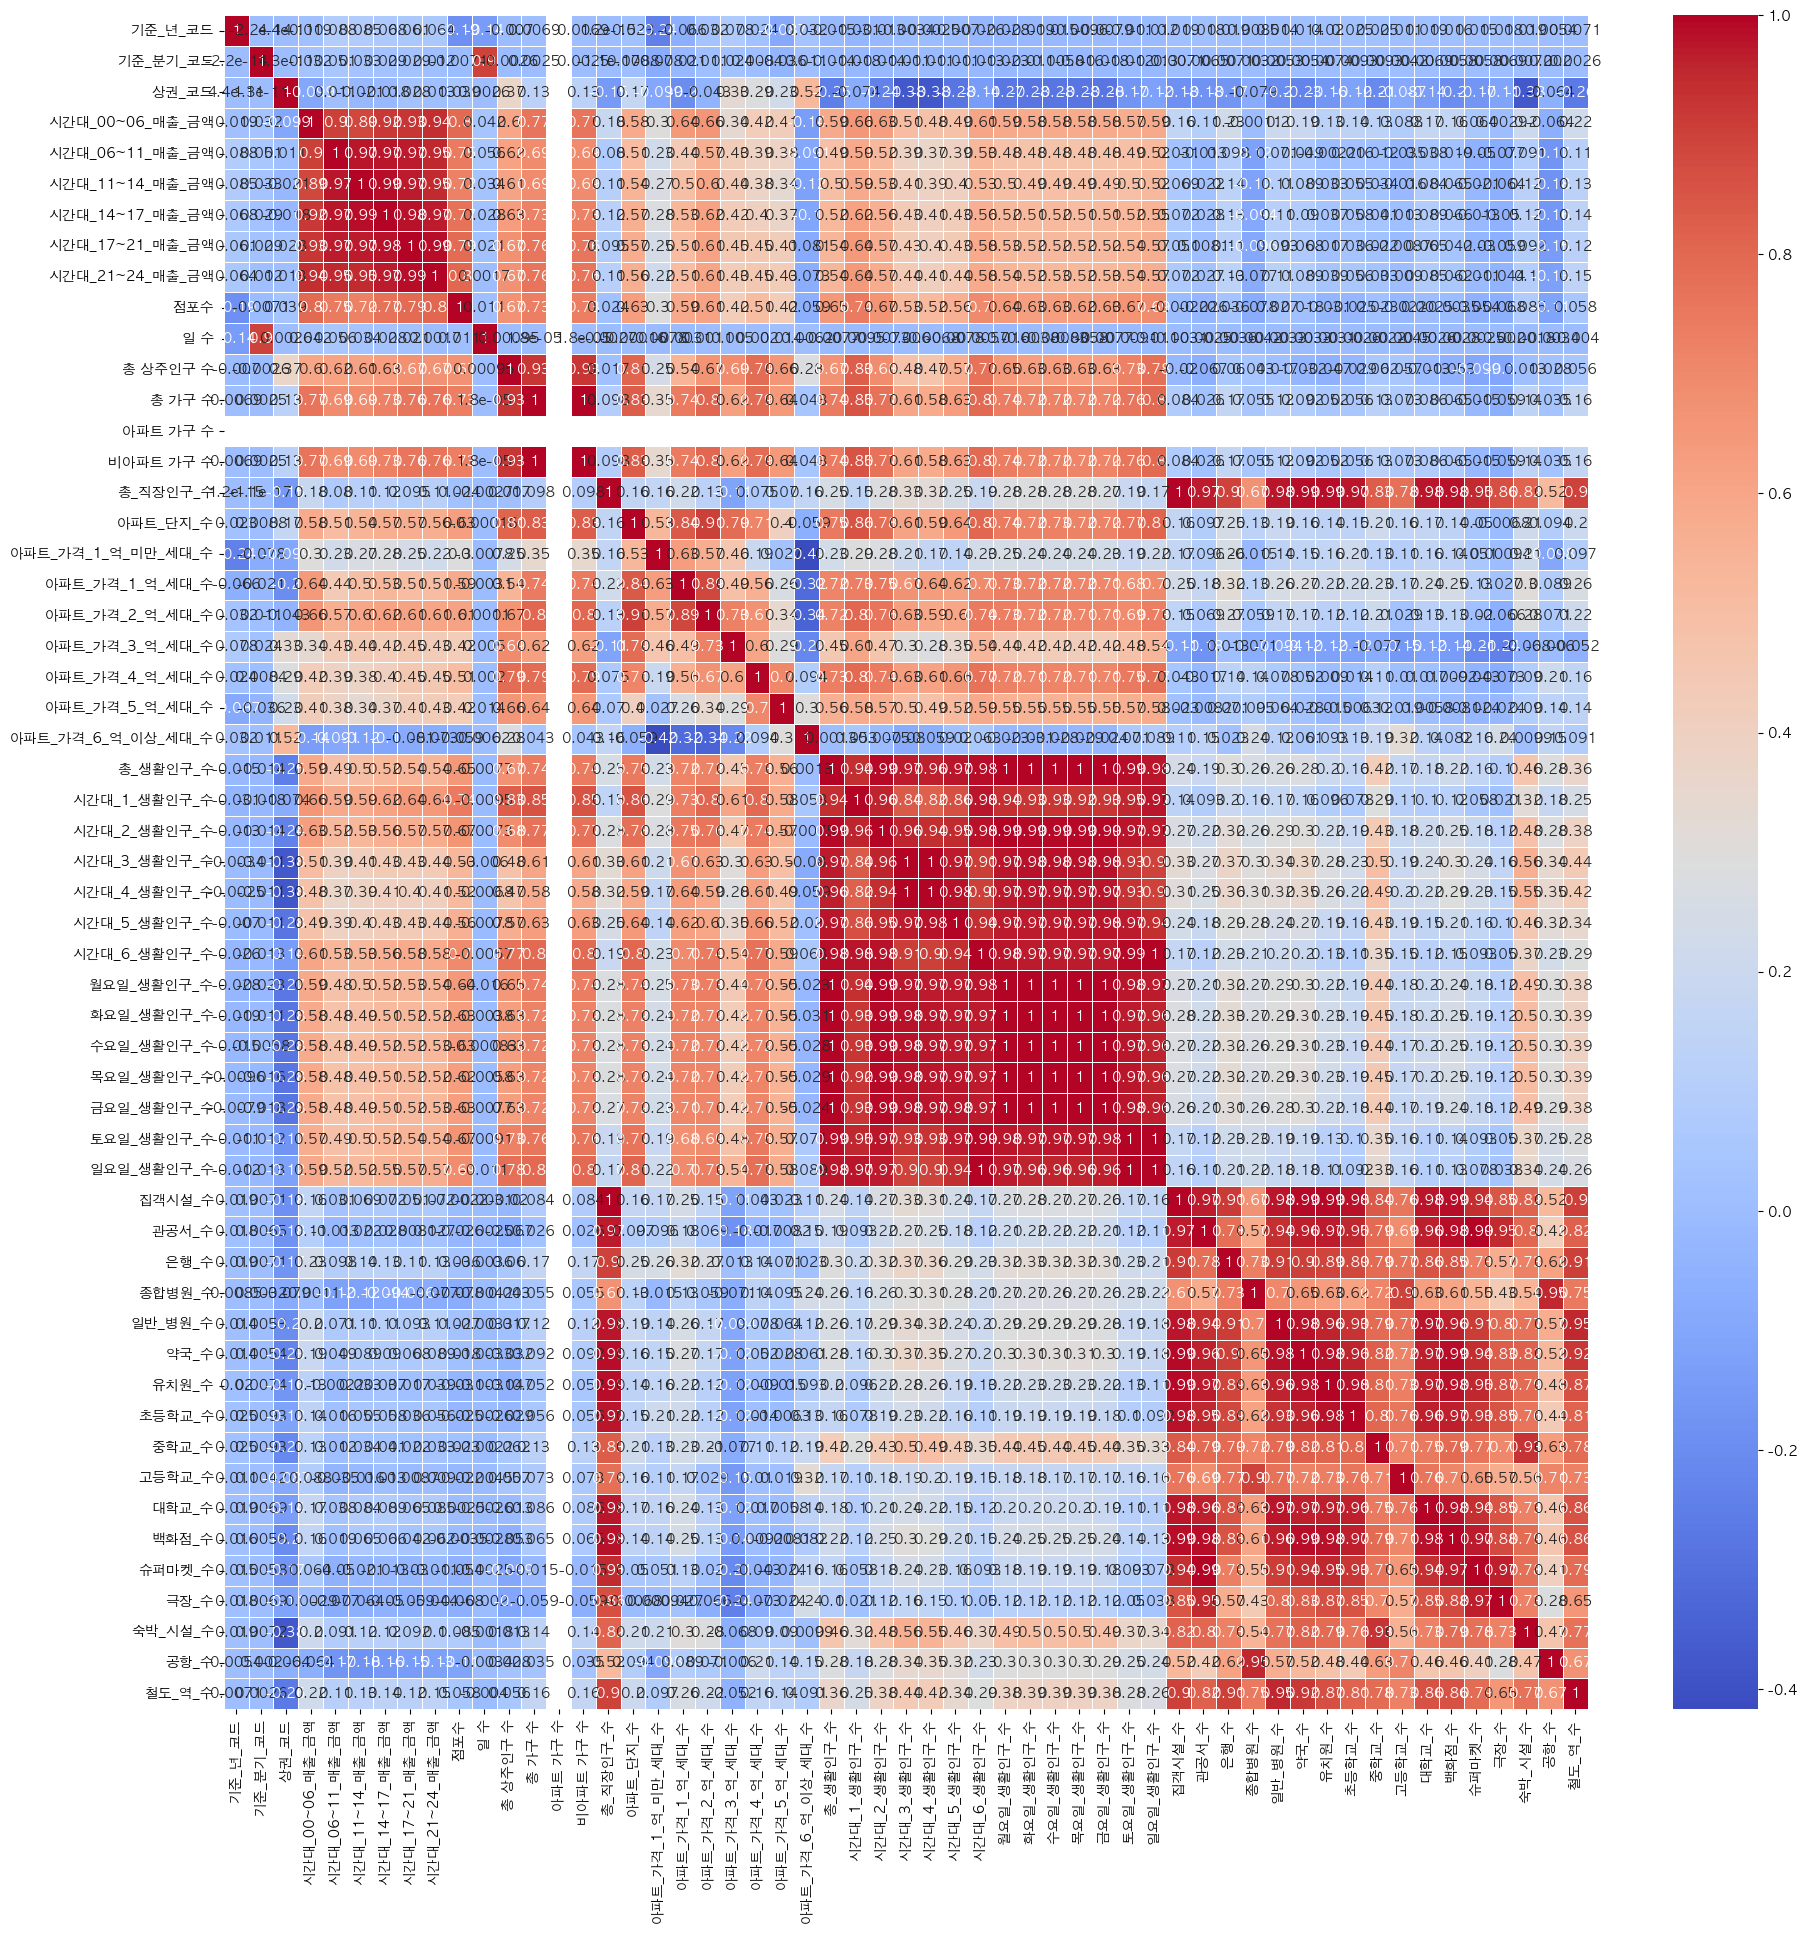

In [71]:
plt.figure(figsize = (22,22))
sns.heatmap(sales_subsales_df.corr() , annot=True, cmap='coolwarm', linewidths=.5)
plt.show()

In [72]:
sales_subsales_df.to_csv(DATA_PATH + '골목상권(상권 + 상권배후지).csv', encoding = 'utf-8-sig')